# EEP 153 Proj 3: Team F (Akinwumi Adesina)

# Food Demand in Nigeria

**Population of Interest**: Young population of Nigeria

**Topics & Goals**: Our project focused on understanding food demand in Nigeria and the relationship between Gross National Income (GNI) and nutritional value of the diet.

## Project Setup

In [1]:
!pip install -r requirements.txt
!pip install python-dateutil
!pip install fooddatacentral

In [2]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

apikey = "lxD6lWLfAtFMmMogo98BZyZakAnjLIADqzEbiTjs" 

## [A] Choice of a population, with supporting expenditure data

In [4]:
#load dataset
consumption_ownprod = pd.read_excel('data/Nigeria LSMS Consumption from Own Production.xlsx')
consumption = pd.read_excel('data/Nigeria LSMS Consumption.xlsx')
expenditures = pd.read_excel('data/Nigeria LSMS.xlsx',sheet_name='Expenditures')
hh_characteristics = pd.read_excel('data/Nigeria LSMS.xlsx',sheet_name='HH Characteristics')
rdi = pd.read_excel('data/Uganda.xlsx',sheet_name='RDI')

Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
# Get expenditures...
expenditures.columns.name = 'j'

expenditures = expenditures.groupby('j',axis=1).sum()
expenditures = expenditures.replace(0,np.nan)
expenditures = np.log(expenditures.set_index(['i','t','m']))

expenditures.head()

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.298317,6.214608,6.291569,NaN,...,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,NaN,NaN,7.313220
10002,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.192957,7.090077,7.600902,NaN,...,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,NaN,NaN,7.090077
10003,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10004,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10006,2010,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,5.703782,5.703782,NaN,NaN,...,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,NaN,NaN,5.991465


In [6]:
# Get HH characteristics...
hh_characteristics.columns.name = 'k'
hh_characteristics.set_index(['i','t','m'],inplace=True)

# Household with more than 3 kids
hh = hh_characteristics
hh['Youth'] = hh['M 00-03']+hh['M 04-08']+hh['F 00-03']+hh['F 04-08']
hh_young = hh[hh['Youth']>3]

hh_characteristics.head()

,,k,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,Youth
i,t,m,,,,,,,,,,,,,,,
10001,2010,Nigeria,0,0,0,0,1,2,0,1,0,0,0,1,2,0,1
10002,2010,Nigeria,0,0,1,1,1,1,0,0,0,0,0,2,1,0,0
10003,2010,Nigeria,0,1,1,1,0,0,1,0,0,1,0,0,1,0,1
10004,2010,Nigeria,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
10006,2010,Nigeria,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


In [7]:
#consumption
if 'm' not in consumption.columns:
    consumption['m'] = 1

consumption = consumption.set_index(['i','t','m','u'])
consumption.columns.name = 'k'

consumption = consumption.apply(lambda x: pd.to_numeric(x,errors='coerce'))
consumption = consumption.replace(0,np.nan)

consumption.head()

k                                 (Cocoyam, Spinach, etc)  Agricultural eggs  \
i       t      m       u                                                       
10001.0 2010.0 Nigeria Kilograms                      NaN               0.89   
                       Litres                         NaN                NaN   
10002.0 2010.0 Nigeria Kilograms                      NaN               0.89   
                       Litres                         NaN                NaN   
10003.0 2010.0 Nigeria Kilograms                      NaN               0.44   

k                                 Animal fat  Apples  Avocado pear  \
i       t      m       u                                             
10001.0 2010.0 Nigeria Kilograms         NaN     NaN           NaN   
                       Litres            NaN     NaN           NaN   
10002.0 2010.0 Nigeria Kilograms         NaN     NaN           NaN   
                       Litres            NaN     NaN           NaN   
10003.0 2010.0 Nigeria Kilograms         NaN     NaN           NaN   

k                                 Baby milk powder  Bananas  Beef  \
i       t      m       u                                            
10001.0 2010.0 Nigeria Kilograms               NaN     1.30   1.0   
                       Litres                  NaN      NaN   NaN   
10002.0 2010.0 Nigeria Kilograms               NaN     1.30   2.0   
                       Litres                  NaN      NaN   NaN   
10003.0 2010.0 Nigeria Kilograms               NaN     0.35   0.3   

k                                 Beer (local and imported)  Biscuits  ...  \
i       t      m       u                                               ...   
10001.0 2010.0 Nigeria Kilograms                        NaN       NaN  ...   
                       Litres                          2.25       NaN  ...   
10002.0 2010.0 Nigeria Kilograms                        NaN       NaN  ...   
                       Litres                          9.00       NaN  ...   
10003.0 2010.0 Nigeria Kilograms                        NaN       NaN  ...   

k                                 Sweet Potatoes   Tea  Tomato puree(canned)  \
i       t      m       u                                                       
10001.0 2010.0 Nigeria Kilograms             1.5   NaN                  0.42   
                       Litres                NaN   NaN                   NaN   
10002.0 2010.0 Nigeria Kilograms             1.8  0.12                  0.56   
                       Litres                NaN   NaN                   NaN   
10003.0 2010.0 Nigeria Kilograms             1.4  0.30                  0.21   

k                                 Tomatoes  Watermelon  Wheat flour  \
i       t      m       u                                              
10001.0 2010.0 Nigeria Kilograms       1.0         NaN          NaN   
                       Litres          NaN         NaN          NaN   
10002.0 2010.0 Nigeria Kilograms       1.0         NaN          NaN   
                       Litres          NaN         NaN          NaN   
10003.0 2010.0 Nigeria Kilograms       1.0         NaN          NaN   

k                                 White beans  Wild game meat  Yam flour  \
i       t      m       u                                                   
10001.0 2010.0 Nigeria Kilograms          3.0             NaN        NaN   
                       Litres             NaN             NaN        NaN   
10002.0 2010.0 Nigeria Kilograms          2.0             NaN        NaN   
                       Litres             NaN             NaN        NaN   
10003.0 2010.0 Nigeria Kilograms          0.6             NaN        NaN   

k                                 Yam-roots  
i       t      m       u                     
10001.0 2010.0 Nigeria Kilograms       16.0  
                       Litres           NaN  
10002.0 2010.0 Nigeria Kilograms       13.8  
                       Litres           NaN  
10003.0 2010.0 Nigeria Kilograms        4.6  

[5

In [8]:
#rdi
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

rdi.head()

k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


### Step 2: Estimate Demand System

Here, use data on log *expenditures* and household characteristics to create a CFEDemand `result`.

In [9]:
def estimate_demand(expenditures,hh_characteristics):
    # Drop food that few people consume
    from cfe.estimation import drop_columns_wo_covariance
    
    expenditures1 = drop_columns_wo_covariance(expenditures,min_obs=30)
    
    use = expenditures1.index.intersection(hh_characteristics.index)
    expenditures1 = expenditures1.loc[use,:]
    hh_characteristics = hh_characteristics.loc[use,:]
    
    expenditures2 = expenditures1.stack()
    hh_characteristics1 = hh_characteristics.stack()

    assert expenditures2.index.names == ['i','t','m','j']
    assert hh_characteristics1.index.names == ['i','t','m','k']
    
    from cfe import Regression

    result = Regression(y=expenditures2,d=hh_characteristics1)
    
    return result,expenditures2

### Demand System for All Household

In [10]:
result1, exp1 = estimate_demand(expenditures,hh_characteristics)

Missing dependencies for OracleDemands.


In [11]:
result1.predicted_expenditures()

i       t     m        j                      
10001   2010  Nigeria  (Cocoyam, Spinach, etc)     156.909249
                       Agricultural eggs           397.586147
                       Bananas                     265.637209
                       Beef                       1000.482019
                       Bread                       394.467437
                                                     ...     
379155  2018  Nigeria  Tomato puree(canned)        269.917715
                       Tomatoes                    308.927296
                       Wheat flour                 855.235718
                       White beans                 881.728278
                       Yam-roots                  1251.744786
Length: 708167, dtype: float64

<IPython.core.display.Javascript object>


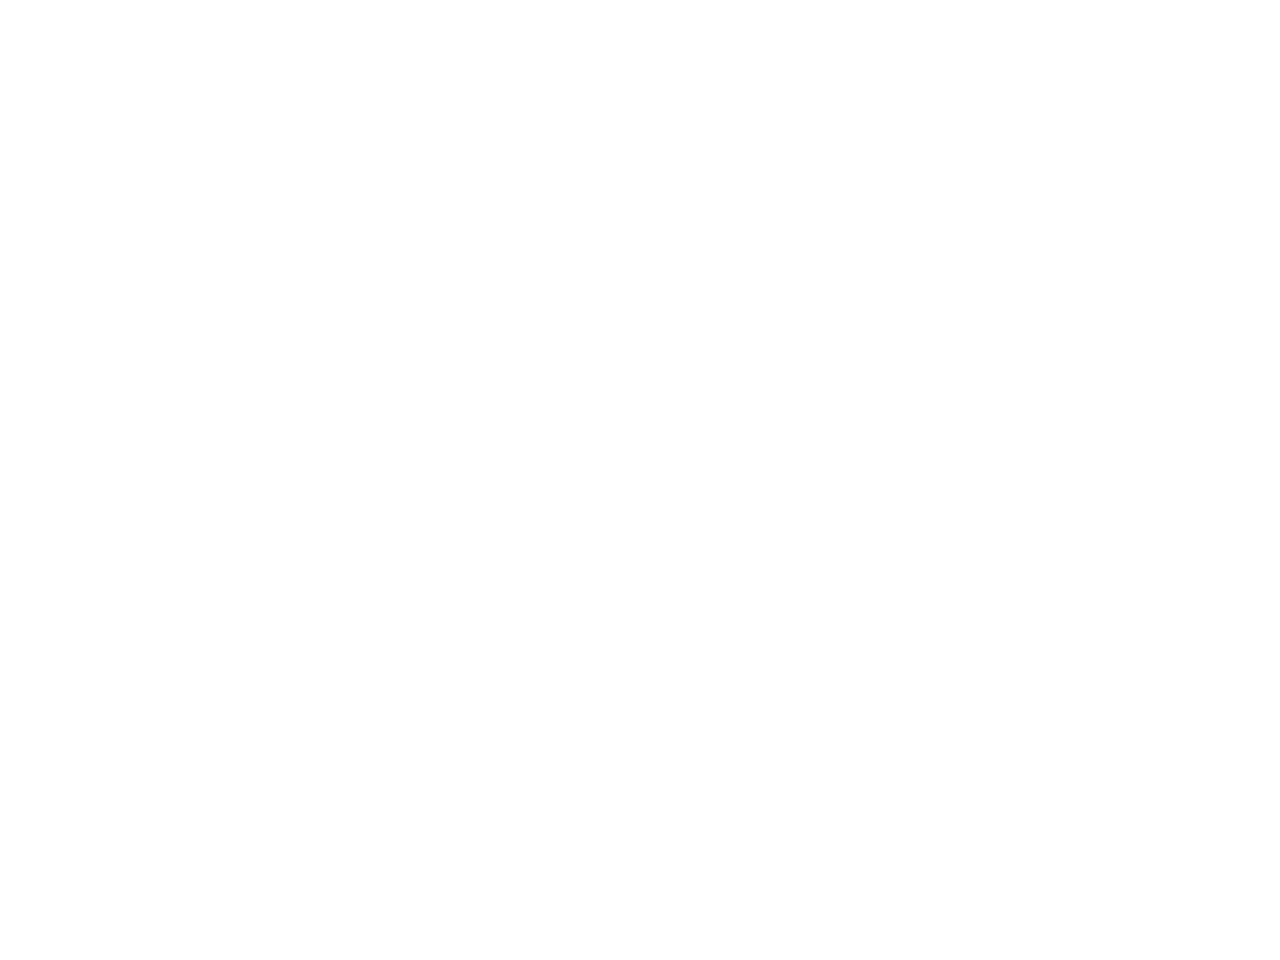

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.DataFrame({'y':exp1,'yhat':result1.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax], color = 'purple')

In [13]:
result1.get_beta().sort_values()

j
Fish-Frozen                             0.246842
Other vegetables (fresh or canned)      0.253198
Garden eggs/egg plant                   0.257859
Okra-fresh                              0.295308
Pineapples                              0.295379
(Cocoyam, Spinach, etc)                 0.305324
Chicken                                 0.318017
Cassava flour                           0.321077
Goat                                    0.324849
Gari -Yellow                            0.326250
Milk tinned (unsweetened)               0.335286
Plantains                               0.336689
Okra-dried                              0.341528
Tomatoes                                0.341543
Beef                                    0.341884
Palm oil                                0.343210
Soft drinks (Coca cola, spirit etc)     0.343263
Yam-roots                               0.347992
Tomato puree(canned)                    0.352777
Orange/tangerine                        0.361425
Brown beans       

<IPython.core.display.Javascript object>


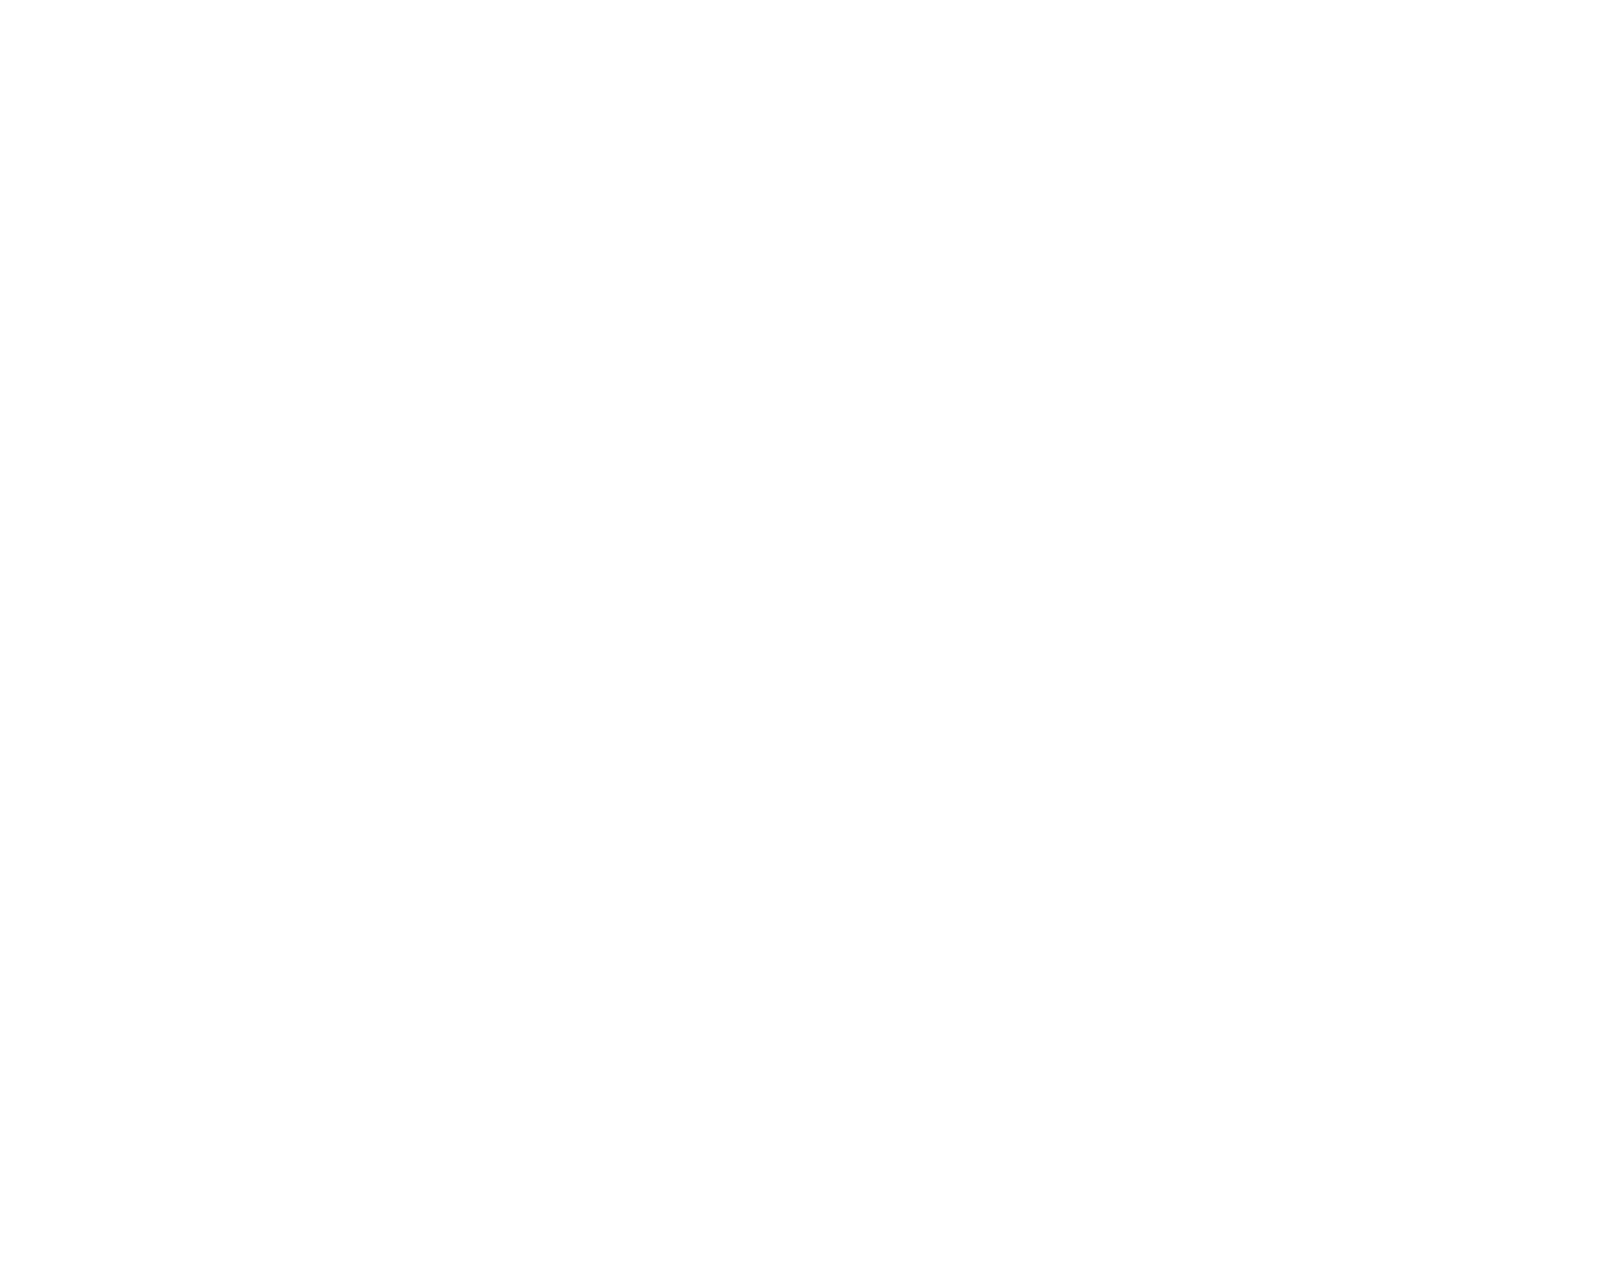

<IPython.core.display.Javascript object>


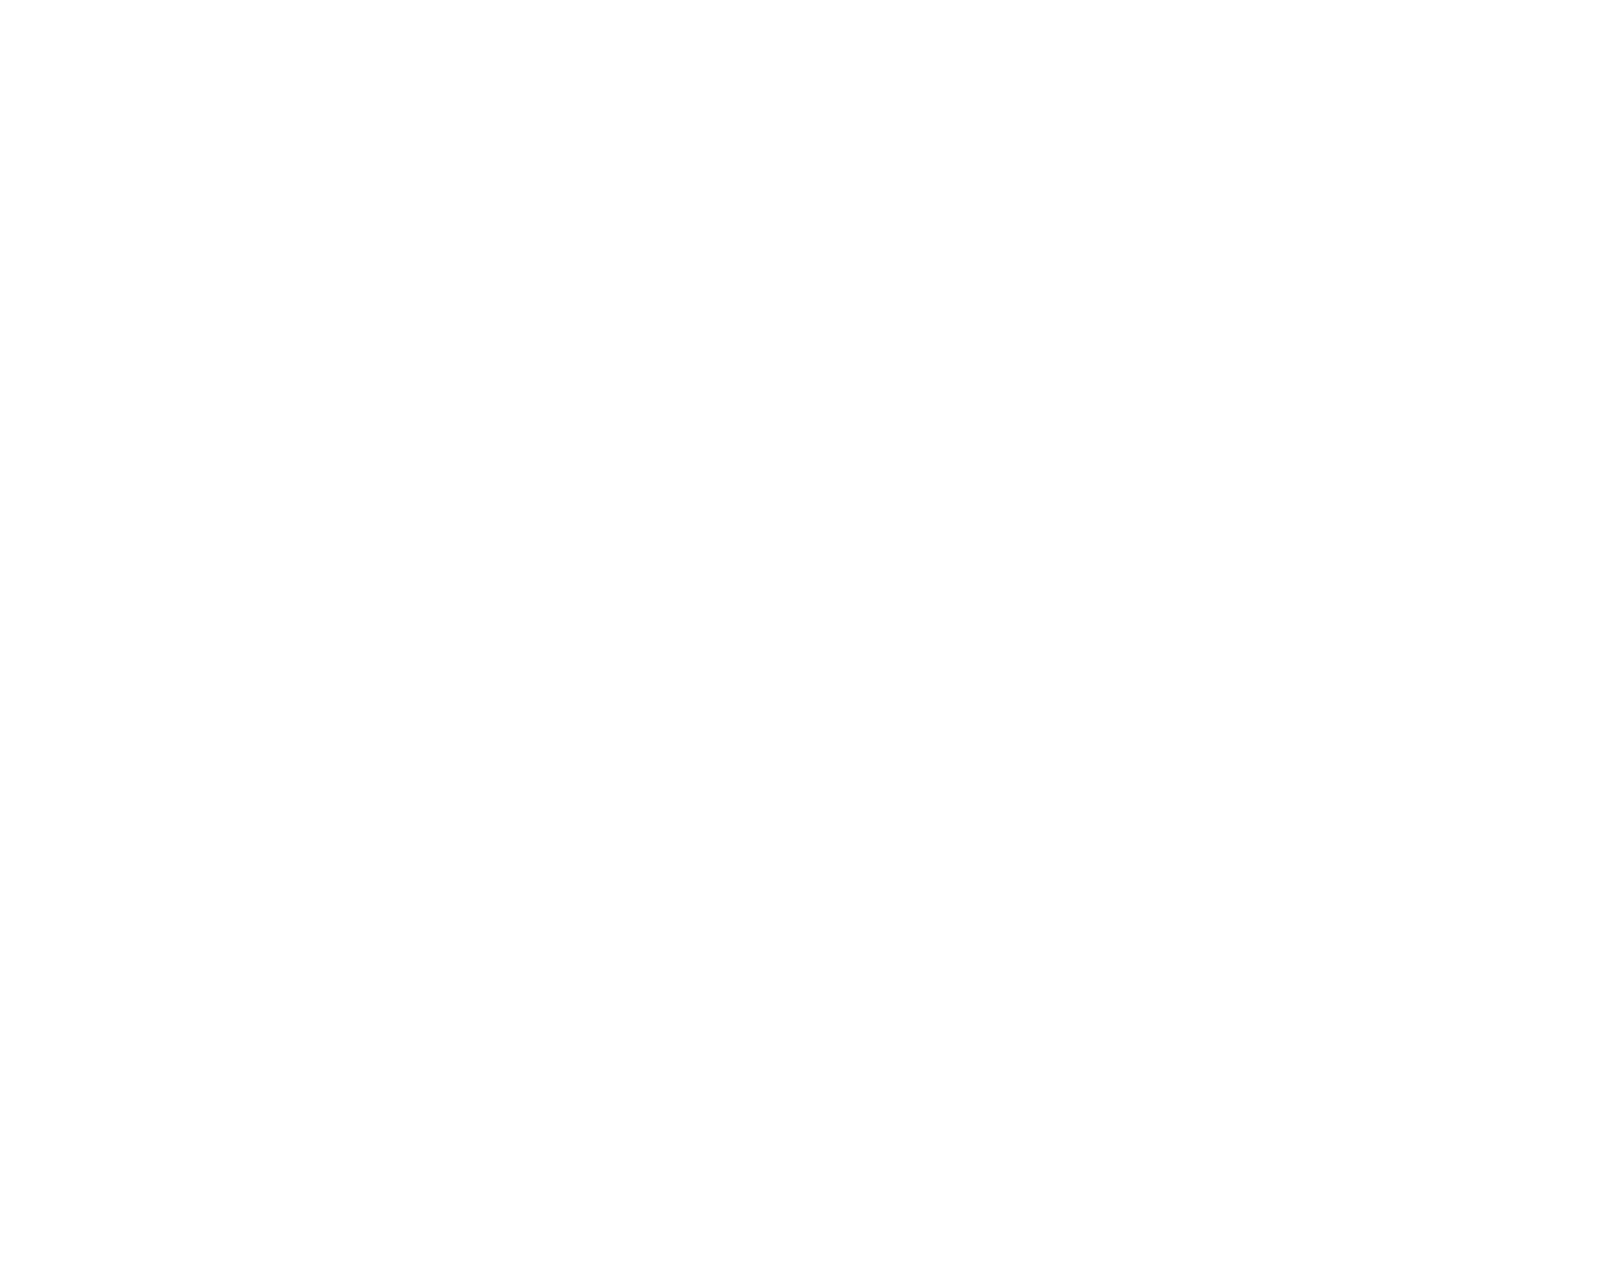

In [14]:
result1.graph_beta()

In [15]:
result1.gamma

k,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,Youth,Constant
j,,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.026767,0.000708,0.030412,-0.033765,0.048779,0.057815,0.101008,0.020288,0.017345,0.033931,0.048556,0.050374,0.070528,0.031611,0.011575,-0.197808
Agricultural eggs,-0.026641,0.015436,0.050232,0.015530,0.089903,0.219877,0.182996,0.021287,0.021832,0.019356,0.028243,0.094256,0.103635,-0.060144,0.031914,-0.474118
Bananas,0.019508,0.001627,0.046346,0.056714,0.095653,0.124172,0.082554,0.005701,-0.008836,0.050533,0.077732,0.056040,0.068480,-0.002241,0.018001,-0.357297
Beef,0.010807,0.021036,0.032596,0.059631,0.084576,0.156356,0.147275,-0.016122,0.008875,0.044356,0.055734,0.099305,0.059286,-0.004953,0.024596,-0.434315
Bread,-0.007588,0.024232,0.031611,0.056330,0.102693,0.172484,0.140703,-0.009999,0.020064,0.063223,0.072251,0.102843,0.096053,0.017779,0.026709,-0.442452
Brown beans,0.004735,0.036937,0.049682,0.065975,0.070143,0.130769,0.110357,0.005064,-0.010367,0.061614,0.090390,0.073097,0.110112,0.060538,0.036369,-0.388814
Cassava flour,-0.017626,0.079204,0.033744,0.085940,0.066803,0.088818,0.074925,-0.088450,0.047901,-0.010453,0.085130,0.052734,0.093547,0.013511,0.021029,-0.296914
Chicken,-0.002673,0.038420,-0.014040,0.032923,0.082972,0.133768,0.161904,-0.057509,0.016840,0.011559,0.042921,0.103479,0.126613,-0.005463,-0.004922,-0.526734
Chocolate drinks,0.028143,-0.022738,0.045409,0.003374,0.071992,0.145705,0.183903,0.036603,-0.002468,0.028193,0.077367,0.131429,0.080670,-0.002316,0.039540,-0.368023


In [16]:
#Save result
result1.to_pickle('my_estimates.pickle')

import cfe
result1 = cfe.regression.read_pickle('my_estimates.pickle')

### Demand System for Household with more than 3 Kids

In [17]:
result2,exp2 = estimate_demand(expenditures,hh_young)

In [18]:
result2.predicted_expenditures()

i       t     m        j                                   
10038   2010  Nigeria  Bananas                                 176.271059
                       Beef                                    593.638173
                       Bread                                   203.012338
                       Chocolate drinks                        262.675908
                       Condiments,(salt,spices,pepper, etc)     48.212644
                                                                  ...    
379089  2018  Nigeria  Sugar                                   256.548951
                       Tomato puree(canned)                    250.282402
                       Tomatoes                                318.018340
                       White beans                             933.947632
                       Yam-roots                               918.334466
Length: 51100, dtype: float64

<IPython.core.display.Javascript object>


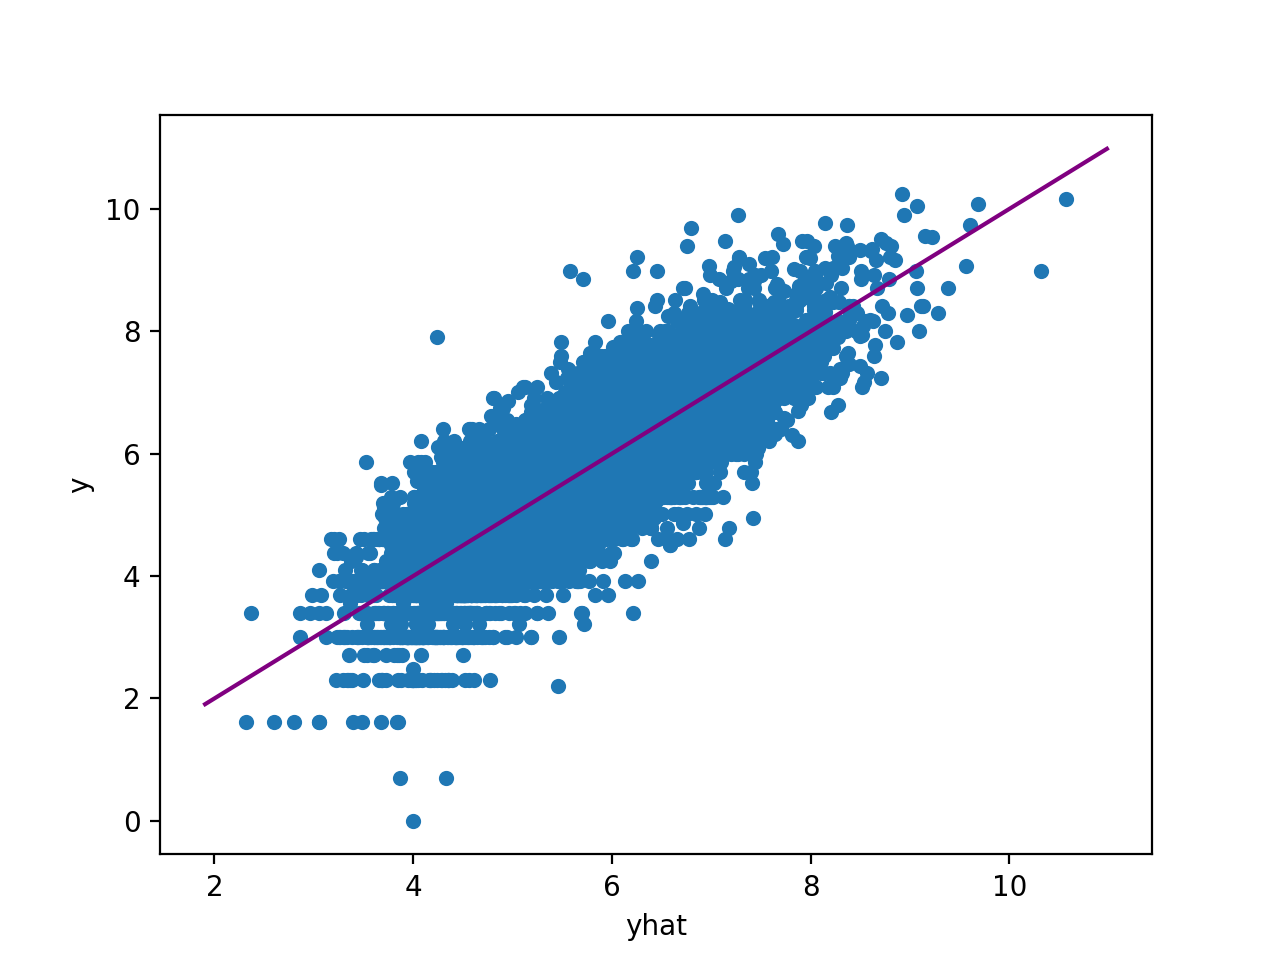

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.DataFrame({'y':exp2,'yhat':result2.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax], color = 'purple')

In [20]:
result2.get_beta().sort_values()

j
Okra-fresh                              0.270790
Yam-roots                               0.283468
Condiments,(salt,spices,pepper, etc)    0.297423
Palm oil                                0.311908
Other vegetables (fresh or canned)      0.319971
Bananas                                 0.325328
Orange/tangerine                        0.341369
Fish-Frozen                             0.342574
Beef                                    0.349967
Soft drinks (Coca cola, spirit etc)     0.356160
Onions                                  0.366493
White beans                             0.366553
Tomato puree(canned)                    0.373336
Groundnut oil                           0.383930
Tomatoes                                0.394269
Gari-White                              0.421843
Fish-Smoked                             0.463356
Bread                                   0.494845
Sachet water                            0.506202
Fish-Dried                              0.568117
Rice-local        

<IPython.core.display.Javascript object>


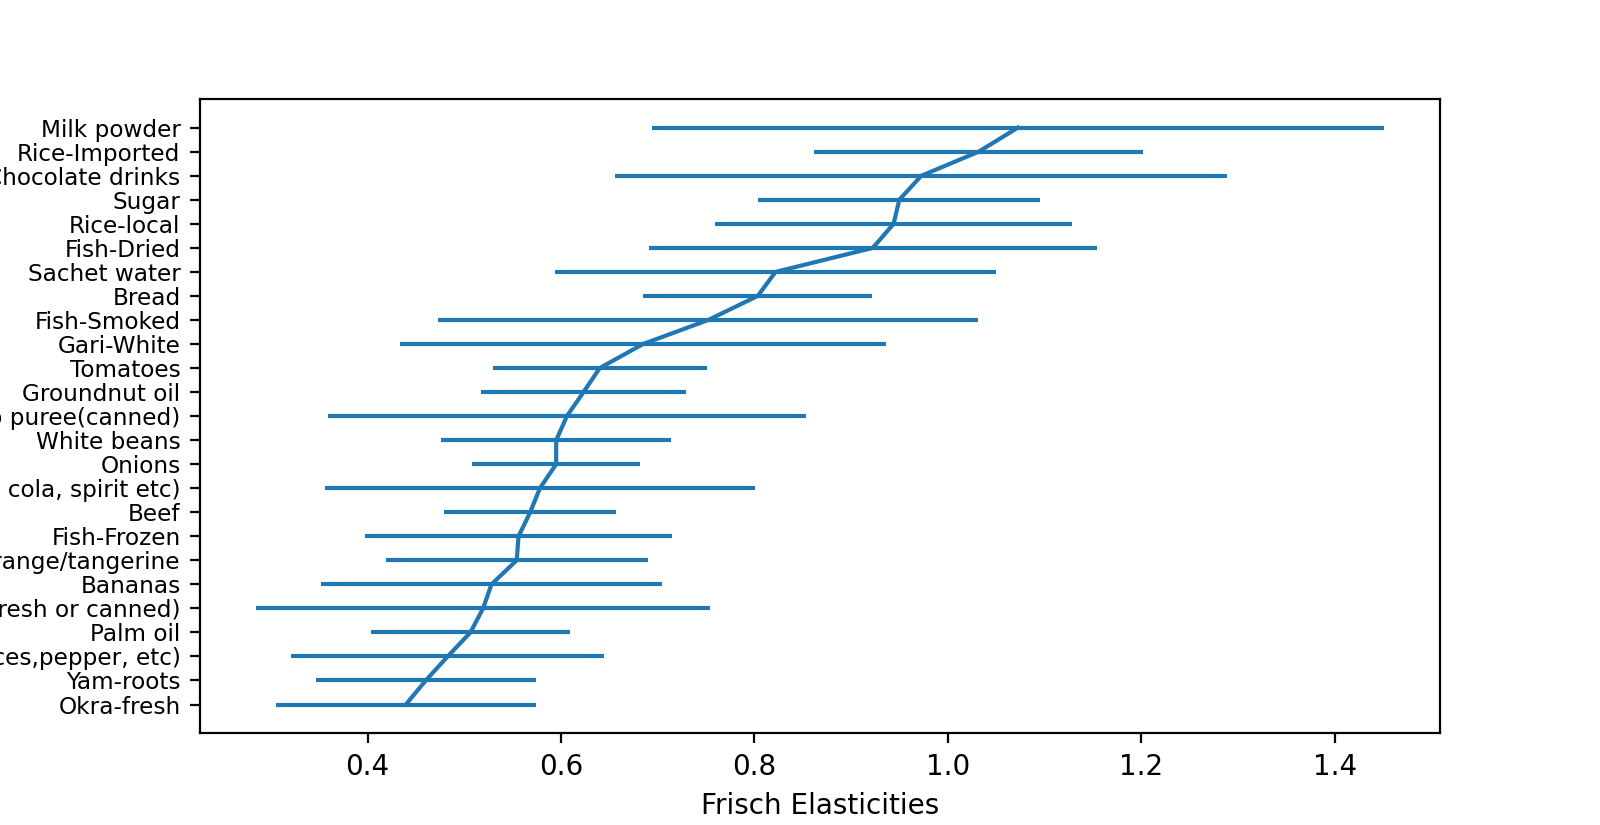

<IPython.core.display.Javascript object>


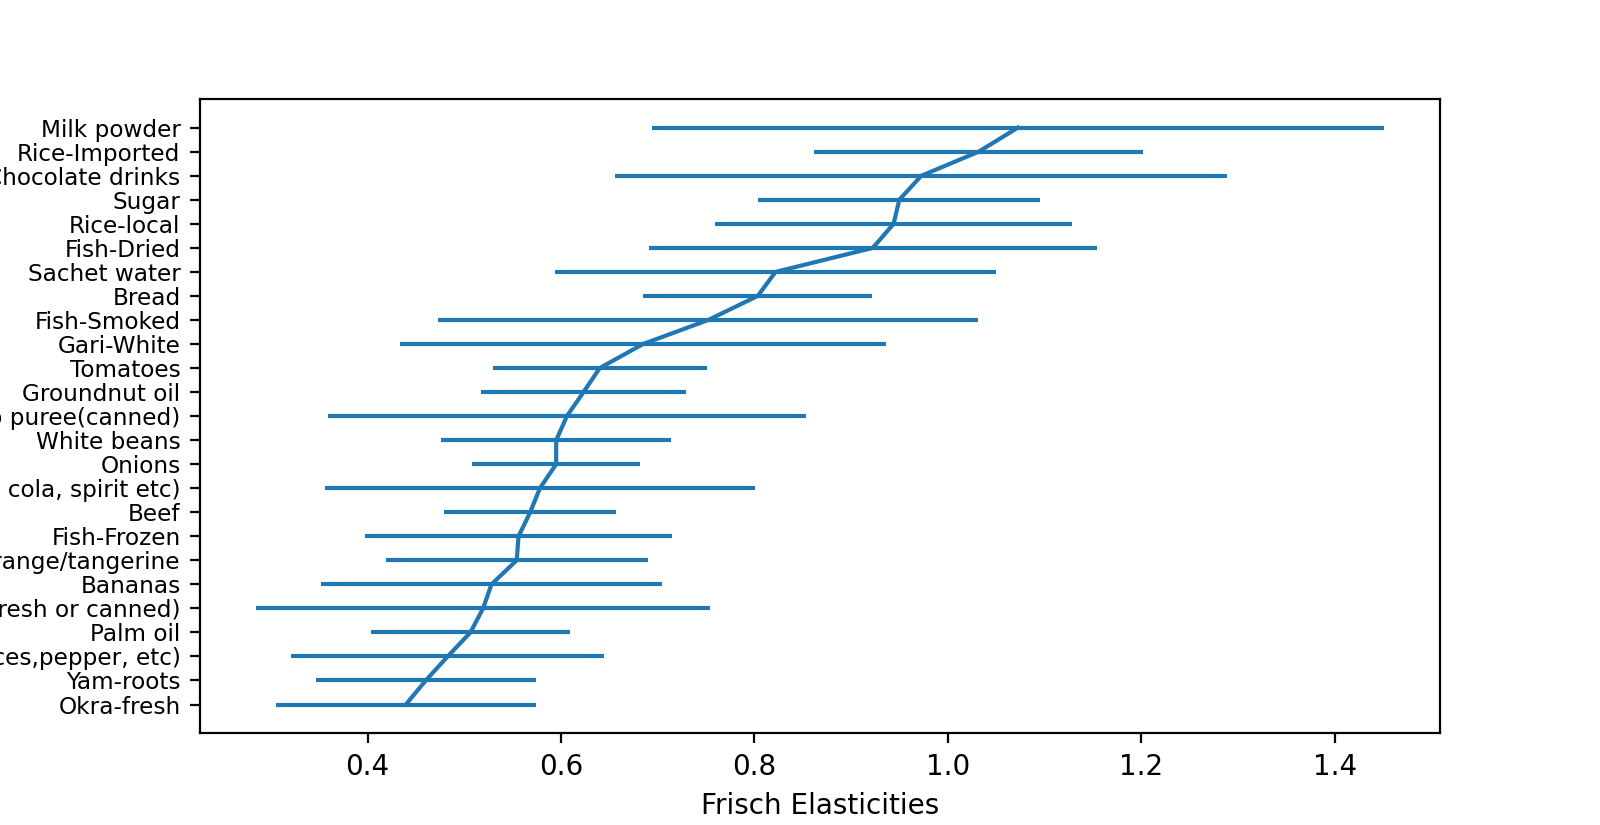

In [21]:
result2.graph_beta()

### [B] Nutritional content of different foods

In [23]:
food_codes = pd.read_excel('data/Food Codes for Nigeria.xlsx')

food_codes.head()

,Food description,From Country,FDC Comments,COICOP,COICOP Comments,USDA FDC ID,WAFCT ID,WAFCT Comments
0,Guinea corn/sorghum,NGA,"""Sorghum grain""",01.1.1.1.3,NaN,169716,01_039,NaN
1,Millet,NGA,"""Cooked millet""",01.1.1.1.5,NaN,168871,01_017,NaN
2,Maize,NGA,WHOLE KERNEL CORN MAIZE,01.1.1.1.6,NaN,1441697,01_004,NaN
3,Rice-local,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_065,NaN
4,Rice-Imported,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_037,NaN


In [25]:
fc = result1.get_beta().to_frame()
table = food_codes.loc[:, ['Food description', 'USDA FDC ID']]

fc_table = fc.merge(table, left_on = 'j', right_on = 'Food description', how = 'inner')

fc_table.head()

,beta,Food description,USDA FDC ID
0,0.679675,"(Cocoyam, Spinach, etc)",1320589
1,1.215686,Agricultural eggs,747997
2,0.854099,Bananas,1102653
3,0.761059,Beef,1098212
4,0.848466,Bread,325871


In [26]:
import warnings
import fooddatacentral as fdc

D = {}
count = 0
for food in fc.index:
    try:
        FDC = fc_table.loc[fc_table['Food description']==food,'USDA FDC ID'].values[0]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
        print(food)
    except AttributeError:
        warnings.warn(f"Couldn't find FDC Code {FDC} for food {food}." % (food,FDC))

D = pd.DataFrame(D,dtype=float)

(Cocoyam, Spinach, etc)
Agricultural eggs
Bananas
Beef
Bread
Brown beans
Cassava flour
Chicken
Chocolate drinks
Condiments,(salt,spices,pepper, etc)
Fish-Dried
Fish-Fresh
Fish-Frozen
Fish-Smoked
Garden eggs/egg plant
Gari -Yellow
Gari-White
Goat
Groundnut oil
Maize flour
Malt drinks
Milk powder
Milk tinned (unsweetened)
Okra-dried
Okra-fresh
Onions
Orange/tangerine
Other vegetables (fresh or canned)
Palm oil
Pineapples
Plantains
Rice-Imported
Rice-local
Sachet water
Soft drinks (Coca cola, spirit etc)
Sugar
Sweet Potatoes
Tea
Tomato puree(canned)
Tomatoes
Wheat flour
White beans
Yam-roots


In [27]:
nutrition_chart = D.fillna(0)
nutrition_chart

,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,"Condiments,(salt,spices,pepper, etc)",...,Sachet water,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Wheat flour,White beans,Yam-roots
Alanine,0.0,0.714,0.00,0.00,0.00,0.00,0.0,0.991,0.00,0.0,...,0.00,0.00,0.00,0.077,0.0,0.052,0.00,0.0,0.00,0.063
"Alcohol, ethyl",0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Amino acids,0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Arginine,0.0,0.691,0.00,0.00,0.00,0.00,0.0,1.128,0.00,0.0,...,0.00,0.00,0.00,0.055,0.0,0.032,0.00,0.0,0.00,0.127
Ash,0.0,0.650,0.00,0.00,2.10,0.00,0.0,1.170,0.00,0.0,...,0.00,0.00,0.01,0.990,0.0,1.280,0.00,0.0,0.00,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Vitamin K (phylloquinone),0.0,0.000,0.50,1.70,0.00,0.00,0.0,0.800,0.20,0.0,...,0.00,0.00,0.00,1.800,0.0,3.400,7.90,0.0,0.00,2.300
Vitamins and Other Components,0.0,0.000,0.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,...,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.0,0.00,0.000
Water,0.0,86.300,74.91,62.58,35.70,0.00,0.0,73.240,78.43,0.0,...,99.90,89.36,0.02,77.280,0.0,87.880,94.52,0.0,0.00,69.600


### [B] Household Nutritional Adequacy

In [28]:
#calculate household recommended intake
hh_characteristics = hh_characteristics[rdi.columns.tolist()]

hh_rdi = hh_characteristics@rdi.T
hh_rwi = hh_rdi*7

#Nigeria data is weekly, so convert to weekly household recommended intake
hh_rwi.head()

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Magnesium,Niacin,Phosphorus,Potassium,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Vitamin E,Vitamin K,Zinc
i,t,m,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,93800.0,2233.0,1313.2,17850.0,46900.0,6370.0,595.0,15890.0,672.0,32620.0,218400.0,53.9,51.8,35700.0,107.1,58.1,3570.0,672.0,4620.0,420.0
10002,2010,Nigeria,100800.0,2352.0,1411.2,18900.0,53200.0,6370.0,623.0,16870.0,714.0,42000.0,228900.0,56.7,54.6,37800.0,113.4,61.6,3675.0,707.0,4515.0,455.0
10003,2010,Nigeria,75600.0,1687.0,1058.4,14000.0,48300.0,5460.0,441.0,12320.0,546.0,39550.0,188300.0,42.7,41.3,28700.0,84.0,48.3,2485.0,518.0,3220.0,357.0
10004,2010,Nigeria,37800.0,952.0,529.2,7700.0,24500.0,2730.0,168.0,6860.0,294.0,18550.0,97300.0,23.1,22.4,15400.0,46.2,29.4,1470.0,287.0,1890.0,189.0
10006,2010,Nigeria,46200.0,1106.0,646.8,8400.0,21000.0,2730.0,238.0,7910.0,322.0,14700.0,98700.0,25.9,24.5,17500.0,50.4,27.3,1785.0,315.0,2310.0,210.0


##### Consumption from purchase

In [29]:
consumption_purchase = consumption.fillna(0).loc[:,consumption.count()>0]
consumption1 = consumption_ownprod.fillna(0).replace('0. NONE', 0).loc[:,consumption_ownprod.count()>0].set_index(['i', 't','m', 'u'])

consumption_purchase.head()

k                                 (Cocoyam, Spinach, etc)  Agricultural eggs  \
i       t      m       u                                                       
10001.0 2010.0 Nigeria Kilograms                      0.0               0.89   
                       Litres                         0.0               0.00   
10002.0 2010.0 Nigeria Kilograms                      0.0               0.89   
                       Litres                         0.0               0.00   
10003.0 2010.0 Nigeria Kilograms                      0.0               0.44   

k                                 Animal fat  Apples  Avocado pear  \
i       t      m       u                                             
10001.0 2010.0 Nigeria Kilograms         0.0     0.0           0.0   
                       Litres            0.0     0.0           0.0   
10002.0 2010.0 Nigeria Kilograms         0.0     0.0           0.0   
                       Litres            0.0     0.0           0.0   
10003.0 2010.0 Nigeria Kilograms         0.0     0.0           0.0   

k                                 Baby milk powder  Bananas  Beef  \
i       t      m       u                                            
10001.0 2010.0 Nigeria Kilograms               0.0     1.30   1.0   
                       Litres                  0.0     0.00   0.0   
10002.0 2010.0 Nigeria Kilograms               0.0     1.30   2.0   
                       Litres                  0.0     0.00   0.0   
10003.0 2010.0 Nigeria Kilograms               0.0     0.35   0.3   

k                                 Beer (local and imported)  Biscuits  ...  \
i       t      m       u                                               ...   
10001.0 2010.0 Nigeria Kilograms                       0.00       0.0  ...   
                       Litres                          2.25       0.0  ...   
10002.0 2010.0 Nigeria Kilograms                       0.00       0.0  ...   
                       Litres                          9.00       0.0  ...   
10003.0 2010.0 Nigeria Kilograms                       0.00       0.0  ...   

k                                 Sweet Potatoes   Tea  Tomato puree(canned)  \
i       t      m       u                                                       
10001.0 2010.0 Nigeria Kilograms             1.5  0.00                  0.42   
                       Litres                0.0  0.00                  0.00   
10002.0 2010.0 Nigeria Kilograms             1.8  0.12                  0.56   
                       Litres                0.0  0.00                  0.00   
10003.0 2010.0 Nigeria Kilograms             1.4  0.30                  0.21   

k                                 Tomatoes  Watermelon  Wheat flour  \
i       t      m       u                                              
10001.0 2010.0 Nigeria Kilograms       1.0         0.0          0.0   
                       Litres          0.0         0.0          0.0   
10002.0 2010.0 Nigeria Kilograms       1.0         0.0          0.0   
                       Litres          0.0         0.0          0.0   
10003.0 2010.0 Nigeria Kilograms       1.0         0.0          0.0   

k                                 White beans  Wild game meat  Yam flour  \
i       t      m       u                                                   
10001.0 2010.0 Nigeria Kilograms          3.0             0.0        0.0   
                       Litres             0.0             0.0        0.0   
10002.0 2010.0 Nigeria Kilograms          2.0             0.0        0.0   
                       Litres             0.0             0.0        0.0   
10003.0 2010.0 Nigeria Kilograms          0.6             0.0        0.0   

k                                 Yam-roots  
i       t      m       u                     
10001.0 2010.0 Nigeria Kilograms       16.0  
                       Litres           0.0  
10002.0 2010.0 Nigeria Kilograms       13.8  
                       Litres           0.0  
10003.0 2010.0 Nigeria Kilograms        4.6  

[5

In [30]:
units_purchase = consumption_purchase.index.levels[3].unique()
units_purchase

Index(['1. KILOGRAMS (KG)', '2. GRAMS (G)', '2. GRAMS (GR)', '3. LITRES (L)',
       '4. CENTILITRES (CL)', 'Basin: Big/Large (40 kg)',
       'Basin: Medium (25 kg)', 'Basin: Small (10 kg)', 'Basket: Big (50 kg)',
       'Basket: Medium (30 kg)', 'Basket: Small (15 kg)',
       'Bunch of Plantain/FFB: Small (5 kg)',
       'Bunch of plantain/FFB: Big (15 kg)',
       'Bunch of plantain/FFB: Medium (8 kg)', 'Grams', 'Kilograms', 'Litres',
       'Mililitre', 'Sack/Bag: Medium (50 kg)', 'Sack/Bag: Small (20 kg)',
       'Tuber of Yam: Big/Large (8 kg)', 'Tuber of Yam: Medium (5 kg)',
       'Tuber of Yam: Small (3 kg)', 'Wheel Barrow: Small (60 kg)',
       'centilitre (cl)', 'grams (g)', 'kilogram (kg)', 'litre (l)'],
      dtype='object', name='u')

In [31]:
#Convert units to FDC units
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[0]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[0]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[1]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[1]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[2]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[2]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[3]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[3]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[4]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[4]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[5]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[5]]*400
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[6]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[6]]*250
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[7]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[7]]*100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[8]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[8]]*500
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[9]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[9]]*300
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[10]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[10]]*150
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[11]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[11]]*50
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[12]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[12]]*150
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[13]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[13]]*80
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[14]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[14]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[15]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[15]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[16]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[16]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[17]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[17]]*0.01
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[18]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[18]]*500
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[19]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[19]]*200
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[20]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[20]]*80
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[21]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[21]]*50
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[22]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[22]]*30
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[23]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[23]]*600
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[24]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[24]]*0.1
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[25]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[25]]/100
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[26]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[26]]*10
consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[27]] = consumption_purchase.iloc[consumption_purchase.index.get_level_values('u') == units_purchase[27]]*10

In [32]:
food_list = fc_table['Food description'].to_list()

In [33]:
#Consumption of each household all in FDC units
consumption_purchase = consumption_purchase.groupby(['i','t']).sum()
consumption_purchase.columns.name = None
consumption_purchase = consumption_purchase.loc[:,food_list]
consumption_purchase

(Cocoyam, Spinach, etc)  Agricultural eggs  Bananas  Beef  \
i        t                                                                   
10001.0  2010.0                      0.0                8.9     13.0  10.0   
         2012.0                      0.0                0.0      0.0   0.0   
         2015.0                      0.0                0.0      0.0  20.0   
         2018.0                      0.0                0.0      0.0  10.0   
10002.0  2010.0                      0.0                8.9     13.0  20.0   
...                                  ...                ...      ...   ...   
379146.0 2018.0                      0.0                0.0      0.0   0.0   
379148.0 2018.0                      0.0                0.0      0.0   5.0   
379151.0 2018.0                      0.0                0.0      0.0   0.0   
379154.0 2018.0                      0.0                0.0      0.0  10.0   
379155.0 2018.0                      0.0                0.0      0.0  10.0   

                 Bread  Brown beans  Cassava flour  Chicken  Chocolate drinks  \
i        t                                                                      
10001.0  2010.0   25.0          0.0            0.0     20.0              5.00   
         2012.0    8.0          0.0            0.0     30.0              2.25   
         2015.0    0.0          0.0            0.0      0.0              0.00   
         2018.0    0.0          0.0            0.0      0.0              0.00   
10002.0  2010.0   15.0          0.0            0.0     30.0              5.00   
...                ...          ...            ...      ...               ...   
379146.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379148.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379151.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379154.0 2018.0    0.0          0.0            0.0     50.0              0.00   
379155.0 2018.0    0.0          0.0            0.0      0.0              0.00   

                 Condiments,(salt,spices,pepper, etc)  ...  Sachet water  \
i        t                                             ...                 
10001.0  2010.0                                   5.0  ...          30.0   
         2012.0                                   0.0  ...           0.0   
         2015.0                                   0.0  ...           0.0   
         2018.0                                   0.0  ...           0.0   
10002.0  2010.0                                   5.0  ...          42.0   
...                                               ...  ...           ...   
379146.0 2018.0                                   0.0  ...           0.0   
379148.0 2018.0                                   0.0  ...           0.0   
379151.0 2018.0                                   0.0  ...           0.0   
379154.0 2018.0                                   0.0  ...           0.0   
379155.0 2018.0                                   0.0  ...           0.0   

                 Soft drinks (Coca cola, spirit etc)  Sugar  Sweet Potatoes  \
i        t                                                                    
10001.0  2010.0                                 10.5    5.0            15.0   
         2012.0                                  0.0    0.0             0.0   
         2015.0                                  1.4    0.0             0.0   
         2018.0                                  0.0    0.0             0.0   
10002.0  2010.0                                 84.0    5.0            18.0   
...                                              ...    ...             ...   
379146.0 2018.0                                  0.0    0.0             0.0   
379148.0 2018.0                                  0.0    0.0             0.0   
379151.0 2018.0                                  0.0    0.0             0.0   
379154.0 2018.0                                  0.0    0.0             0.0   
379155.0 20

In [34]:
nutri = consumption_purchase@nutrition_chart.T
nutri

Alanine  Alcohol, ethyl  Amino acids  Arginine         Ash  \
i        t                                                                     
10001.0  2010.0  115.8758          50.820          0.0  162.2677  441.317000   
         2012.0   36.3828           0.000          0.0   54.3930  144.929997   
         2015.0    0.0000           5.082          0.0    0.0000    0.000000   
         2018.0    0.0000           0.000          0.0    0.0000    0.000000   
10002.0  2010.0   58.5438          25.410          0.0   74.9331  238.973000   
...                   ...             ...          ...       ...         ...   
379146.0 2018.0    0.0000           0.000          0.0   15.1200   11.100000   
379148.0 2018.0    0.0000           0.000          0.0    0.0000    0.000000   
379151.0 2018.0    0.0000           0.000          0.0    0.0000    0.000000   
379154.0 2018.0   49.5500           0.000          0.0   56.4000   58.500000   
379155.0 2018.0    0.0000           0.000          0.0    0.0000    0.000000   

                 Aspartic acid  Betaine  Boron, B  Caffeine   Calcium, Ca  \
i        t                                                                  
10001.0  2010.0     202.795200   154.84   36900.0    109.50  29222.600000   
         2012.0      64.866599   231.42       0.0      6.75   8304.449932   
         2015.0       0.000000     0.00       0.0     12.60    346.680000   
         2018.0       0.000000     0.00       0.0      0.00    170.000000   
10002.0  2010.0     109.751600   232.12   24600.0    771.00  20046.700000   
...                        ...      ...       ...       ...           ...   
379146.0 2018.0       0.000000     0.00       0.0      0.00    130.000000   
379148.0 2018.0       0.000000     0.00       0.0      0.00     85.000000   
379151.0 2018.0       0.000000     0.00       0.0      0.00      0.000000   
379154.0 2018.0      80.800000   385.00       0.0      0.00    470.000000   
379155.0 2018.0       0.000000     0.00       0.0      0.00    170.000000   

                 ...  Vitamin D (D2 + D3), International Units  \
i        t       ...                                             
10001.0  2010.0  ...                                       0.0   
         2012.0  ...                                       0.0   
         2015.0  ...                                       0.0   
         2018.0  ...                                       0.0   
10002.0  2010.0  ...                                      80.0   
...              ...                                       ...   
379146.0 2018.0  ...                                       0.0   
379148.0 2018.0  ...                                       0.0   
379151.0 2018.0  ...                                       0.0   
379154.0 2018.0  ...                                       0.0   
379155.0 2018.0  ...                                       0.0   

                 Vitamin D3 (cholecalciferol)  Vitamin E (alpha-tocopherol)  \
i        t                                                                    
10001.0  2010.0                           0.0                    711.306000   
         2012.0                           0.0                    173.284499   
         2015.0                           0.0                    319.700000   
         2018.0                           0.0                      1.700000   
10002.0  2010.0                           2.0                    679.146000   
...                                       ...                           ...   
379146.0 2018.0                           0.0                    470.700000   
379148.0 2018.0                           0.0                      0.850000   
379151.0 2018.0                           0.0                   1108.300000   
379154.0 2018.0                           0.0                     15.200000   
379155.0 2018.0                           0.0                      1.700000   

                 Vitamin E, added  Vitamin K (Dihydrophylloquinone)  \
i        t       

In [35]:
use = nutri.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutri[use]/hh_rwi[use]).dropna()

nutrient_ratio

Energy    Niacin   Protein  Riboflavin   Thiamin  \
i        t      m                                                             
10001.0  2010.0 Nigeria  5.497453  1.032000  1.817597    0.695647  1.018127   
         2012.0 Nigeria  1.038368  0.479420  0.540064    0.330690  0.437206   
         2015.0 Nigeria  0.789861  0.187935  0.250821    0.084599  0.024644   
         2018.0 Nigeria  0.037538  0.087857  0.116422    0.039221  0.011376   
10002.0  2010.0 Nigeria  2.434771  0.719661  1.054157    0.549002  0.662396   
...                           ...       ...       ...         ...       ...   
379146.0 2018.0 Nigeria  0.541463  0.086406  0.137517    0.140000  0.033435   
379148.0 2018.0 Nigeria  0.073512  0.192187  0.222449    0.082967  0.025595   
379151.0 2018.0 Nigeria  2.816460  0.000000  0.156085    0.000000  0.000000   
379154.0 2018.0 Nigeria  1.156071  1.532381  1.465546    0.807143  0.365217   
379155.0 2018.0 Nigeria  0.053463  0.133696  0.177959    0.059921  0.017551   

                         Vitamin B-12  Vitamin B-6  
i        t      m                                   
10001.0  2010.0 Nigeria      0.886387     2.418437  
         2012.0 Nigeria      0.592165     0.870145  
         2015.0 Nigeria      0.585214     0.157605  
         2018.0 Nigeria      0.276705     0.070996  
10002.0  2010.0 Nigeria      0.669189     1.553052  
...                               ...          ...  
379146.0 2018.0 Nigeria      0.168155     0.000000  
379148.0 2018.0 Nigeria      0.639881     0.180220  
379151.0 2018.0 Nigeria      0.000000     0.000000  
379154.0 2018.0 Nigeria      1.473214     1.375238  
379155.0 2018.0 Nigeria      0.426587     0.123308  

[17023 rows x 7 columns]

<IPython.core.display.Javascript object>


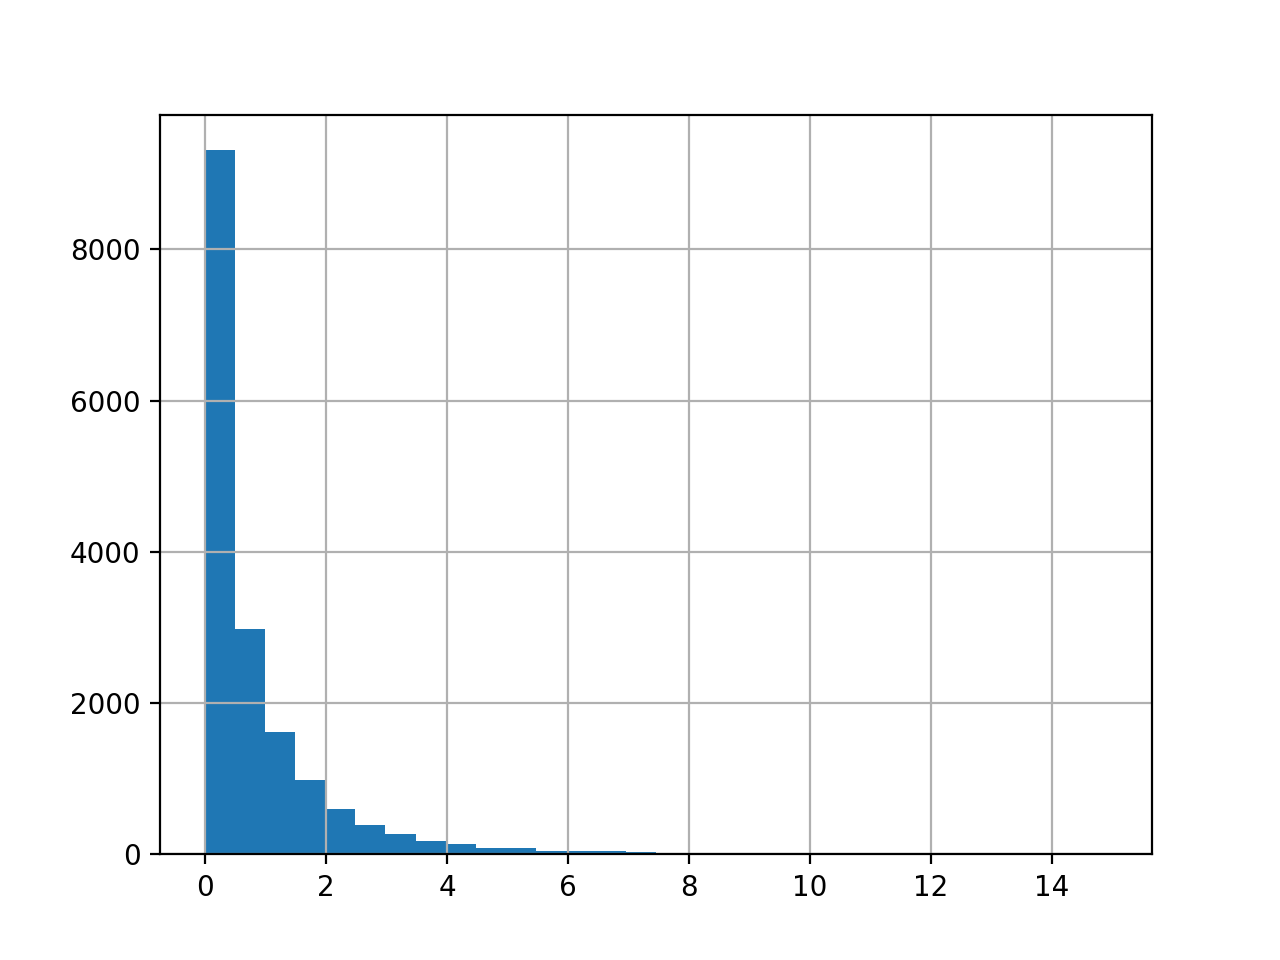

<AxesSubplot:>

In [36]:
#Histogram of nutrition adequancy if only consider purchase
%matplotlib notebook
nutrient_ratio['Energy'].loc[:, nutrient_ratio['Energy'] <= 15].hist(bins=30)

##### Consumption including both purchase and own production

In [37]:
units = consumption_ownprod.loc[:, 'u'].unique()

In [38]:
#Convert units to FDC units
consumption1.iloc[consumption1.index.get_level_values('u') == units[0]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[0]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[1]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[1]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[2]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[2]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[3]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[3]]*100
consumption1.iloc[consumption1.index.get_level_values('u') == units[4]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[4]]*100
consumption1.iloc[consumption1.index.get_level_values('u') == units[5]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[5]]*50
consumption1.iloc[consumption1.index.get_level_values('u') == units[6]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[6]]*200
consumption1.iloc[consumption1.index.get_level_values('u') == units[7]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[7]]*30
consumption1.iloc[consumption1.index.get_level_values('u') == units[8]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[8]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[9]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[9]]*80
consumption1.iloc[consumption1.index.get_level_values('u') == units[10]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[10]]*80
consumption1.iloc[consumption1.index.get_level_values('u') == units[11]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[11]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[12]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[12]]*150
consumption1.iloc[consumption1.index.get_level_values('u') == units[13]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[13]]*600
#Missing data: 15kg for Bundle of Millet, G/corn, Sugarcane, Vegetable etc: Small
consumption1.iloc[consumption1.index.get_level_values('u') == units[14]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[14]]*150
#Missing data: 15kg for Bundle of Millet, G/corn, Sugarcane, Vegetable etc: Medium
consumption1.iloc[consumption1.index.get_level_values('u') == units[15]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[15]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[16]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[16]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[17]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[17]]*300
consumption1.iloc[consumption1.index.get_level_values('u') == units[18]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[18]]*50
consumption1.iloc[consumption1.index.get_level_values('u') == units[19]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[19]]*1200
consumption1.iloc[consumption1.index.get_level_values('u') == units[20]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[20]]*500
consumption1.iloc[consumption1.index.get_level_values('u') == units[21]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[21]]*150
consumption1.iloc[consumption1.index.get_level_values('u') == units[22]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[22]]*400
consumption1.iloc[consumption1.index.get_level_values('u') == units[23]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[23]]*750
consumption1.iloc[consumption1.index.get_level_values('u') == units[24]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[24]]*500
consumption1.iloc[consumption1.index.get_level_values('u') == units[25]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[25]]*200
consumption1.iloc[consumption1.index.get_level_values('u') == units[26]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[26]]*400
consumption1.iloc[consumption1.index.get_level_values('u') == units[27]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[27]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[28]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[28]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[29]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[29]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[30]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[30]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[31]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[31]]*10
consumption1.iloc[consumption1.index.get_level_values('u') == units[32]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[32]]*250
consumption1.iloc[consumption1.index.get_level_values('u') == units[33]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[33]]*0.01
consumption1.iloc[consumption1.index.get_level_values('u') == units[34]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[34]]/100
consumption1.iloc[consumption1.index.get_level_values('u') == units[35]] = consumption1.iloc[consumption1.index.get_level_values('u') == units[35]]/100

In [39]:
#Consumption from own production for each household all in FDC units
consumption1 = consumption1.groupby(['i','t']).sum()
consumption1 = consumption1.loc[1:,food_list]
consumption1

(Cocoyam, Spinach, etc)  Agricultural eggs  Bananas  Beef  \
i        t                                                                   
10001.0  2012.0                      0.0                0.0     10.0   0.0   
         2015.0                      0.0                0.0      0.0  20.0   
         2018.0                      0.0                0.0      0.0   0.0   
10002.0  2012.0                      0.0                0.0     13.0   4.0   
         2015.0                      0.0                0.0      0.0  10.0   
...                                  ...                ...      ...   ...   
379146.0 2018.0                      0.0                0.0      0.0   0.0   
379148.0 2018.0                      0.0                0.0      0.0   0.0   
379151.0 2018.0                      0.0                0.0      0.0   0.0   
379154.0 2018.0                      0.0                0.0      0.0   0.0   
379155.0 2018.0                      0.0                0.0      0.0   0.0   

                 Bread  Brown beans  Cassava flour  Chicken  Chocolate drinks  \
i        t                                                                      
10001.0  2012.0    8.0          0.0            0.0     30.0              2.25   
         2015.0    0.0          0.0            0.0      0.0              0.00   
         2018.0    0.0          0.0            0.0      0.0              0.00   
10002.0  2012.0    4.0          0.0            0.0     25.0              2.25   
         2015.0    0.0          0.0            0.0     20.0              0.00   
...                ...          ...            ...      ...               ...   
379146.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379148.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379151.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379154.0 2018.0    0.0          0.0            0.0      0.0              0.00   
379155.0 2018.0    0.0          0.0            0.0      0.0              0.00   

                 Condiments,(salt,spices,pepper, etc)  ...  Sachet water  \
i        t                                             ...                 
10001.0  2012.0                                   0.0  ...           0.0   
         2015.0                                   0.0  ...           0.0   
         2018.0                                   0.0  ...           0.0   
10002.0  2012.0                                   0.0  ...           1.8   
         2015.0                                   0.0  ...           0.0   
...                                               ...  ...           ...   
379146.0 2018.0                                   0.0  ...           0.0   
379148.0 2018.0                                   0.0  ...           0.0   
379151.0 2018.0                                   0.0  ...           0.0   
379154.0 2018.0                                   0.0  ...           0.0   
379155.0 2018.0                                   0.0  ...           0.0   

                 Soft drinks (Coca cola, spirit etc)  Sugar  Sweet Potatoes  \
i        t                                                                    
10001.0  2012.0                                  0.0    0.0             0.0   
         2015.0                                  1.4    0.0             0.0   
         2018.0                                  0.0    0.0             0.0   
10002.0  2012.0                                  0.7    0.0             0.0   
         2015.0                                  1.4    0.0             0.0   
...                                              ...    ...             ...   
379146.0 2018.0                                  0.0    0.0             0.0   
379148.0 2018.0                                  0.0    0.0             0.0   
379151.0 2018.0                                  0.0    0.0             0.0   
379154.0 2018.0                                  0.0    0.0             0.0   
379155.0 20

In [40]:
nutri_prod = consumption1@nutrition_chart.T
nutri_prod

Alanine  Alcohol, ethyl  Amino acids  Arginine         Ash  \
i        t                                                                    
10001.0  2012.0  36.3828           0.000          0.0    54.393  144.929997   
         2015.0   0.0000           5.082          0.0     0.000    0.000000   
         2018.0   0.0000           0.000          0.0     0.000    0.000000   
10002.0  2012.0  32.2468           5.082          0.0    50.404  141.339998   
         2015.0  19.8200           5.082          0.0    22.560   23.400000   
...                  ...             ...          ...       ...         ...   
379146.0 2018.0   0.0000           0.000          0.0     0.000    0.000000   
379148.0 2018.0   0.0000           0.000          0.0     0.000    0.000000   
379151.0 2018.0   0.0000           0.000          0.0     0.000    0.000000   
379154.0 2018.0   0.0000           0.000          0.0     0.000    0.000000   
379155.0 2018.0   0.0000           0.000          0.0     0.000    0.000000   

                 Aspartic acid  Betaine  Boron, B  Caffeine  Calcium, Ca  ...  \
i        t                                                                ...   
10001.0  2012.0      64.866599   231.42       0.0      6.75  8354.449932  ...   
         2015.0       0.000000     0.00       0.0     12.60   346.680000  ...   
         2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   
10002.0  2012.0      58.801600   192.92       0.0     13.05  8019.279969  ...   
         2015.0      32.320000   154.00       0.0     12.60   296.680000  ...   
...                        ...      ...       ...       ...          ...  ...   
379146.0 2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   
379148.0 2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   
379151.0 2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   
379154.0 2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   
379155.0 2018.0       0.000000     0.00       0.0      0.00     0.000000  ...   

                 Vitamin D (D2 + D3), International Units  \
i        t                                                  
10001.0  2012.0                                       0.0   
         2015.0                                       0.0   
         2018.0                                       0.0   
10002.0  2012.0                                       0.0   
         2015.0                                       0.0   
...                                                   ...   
379146.0 2018.0                                       0.0   
379148.0 2018.0                                       0.0   
379151.0 2018.0                                       0.0   
379154.0 2018.0                                       0.0   
379155.0 2018.0                                       0.0   

                 Vitamin D3 (cholecalciferol)  Vitamin E (alpha-tocopherol)  \
i        t                                                                    
10001.0  2012.0                           0.0                     74.649999   
         2015.0                           0.0                   7910.900000   
         2018.0                           0.0                      0.000000   
10002.0  2012.0                           0.0                     87.678999   
         2015.0                           0.0                   7914.600000   
...                                       ...                           ...   
379146.0 2018.0                           0.0                      0.000000   
379148.0 2018.0                           0.0                      0.000000   
379151.0 2018.0                           0.0                      0.000000   
379154.0 2018.0                           0.0                      0.000000   
379155.0 2018.0                           0.0                      0.000000   

                 Vitamin E, added  Vitamin K (Dihydrophylloquinone)  \
i        t                                

In [53]:
nutri_total = nutri_prod.append(nutri).groupby(['i','t']).sum()

nutrient_ratio_total = (nutri_total[use]/hh_rwi[use]).dropna()

nutrient_ratio_total

/tmp/ipykernel_401/862311205.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nutri_total = nutri_prod.append(nutri).groupby(['i','t']).sum()


Energy    Niacin   Protein  Riboflavin   Thiamin  \
i        t      m                                                              
10001.0  2010.0 Nigeria   5.497453  1.032000  1.817597    0.695647  1.018127   
         2012.0 Nigeria   1.938508  0.967975  1.084734    0.673945  0.879948   
         2015.0 Nigeria  18.659226  0.375870  0.501642    0.169198  0.049289   
         2018.0 Nigeria   0.037538  0.087857  0.116422    0.039221  0.011376   
10002.0  2010.0 Nigeria   2.434771  0.719661  1.054157    0.549002  0.662396   
...                            ...       ...       ...         ...       ...   
379146.0 2018.0 Nigeria   0.541463  0.086406  0.137517    0.140000  0.033435   
379148.0 2018.0 Nigeria   0.073512  0.192187  0.222449    0.082967  0.025595   
379151.0 2018.0 Nigeria   2.816460  0.000000  0.156085    0.000000  0.000000   
379154.0 2018.0 Nigeria   1.156071  1.532381  1.465546    0.807143  0.365217   
379155.0 2018.0 Nigeria   0.053463  0.133696  0.177959    0.059921  0.017551   

                         Vitamin B-12  Vitamin B-6  
i        t      m                                   
10001.0  2010.0 Nigeria      0.886387     2.418437  
         2012.0 Nigeria      1.184329     1.794340  
         2015.0 Nigeria      1.170427     0.315210  
         2018.0 Nigeria      0.276705     0.070996  
10002.0  2010.0 Nigeria      0.669189     1.553052  
...                               ...          ...  
379146.0 2018.0 Nigeria      0.168155     0.000000  
379148.0 2018.0 Nigeria      0.639881     0.180220  
379151.0 2018.0 Nigeria      0.000000     0.000000  
379154.0 2018.0 Nigeria      1.473214     1.375238  
379155.0 2018.0 Nigeria      0.426587     0.123308  

[17662 rows x 7 columns]

<IPython.core.display.Javascript object>


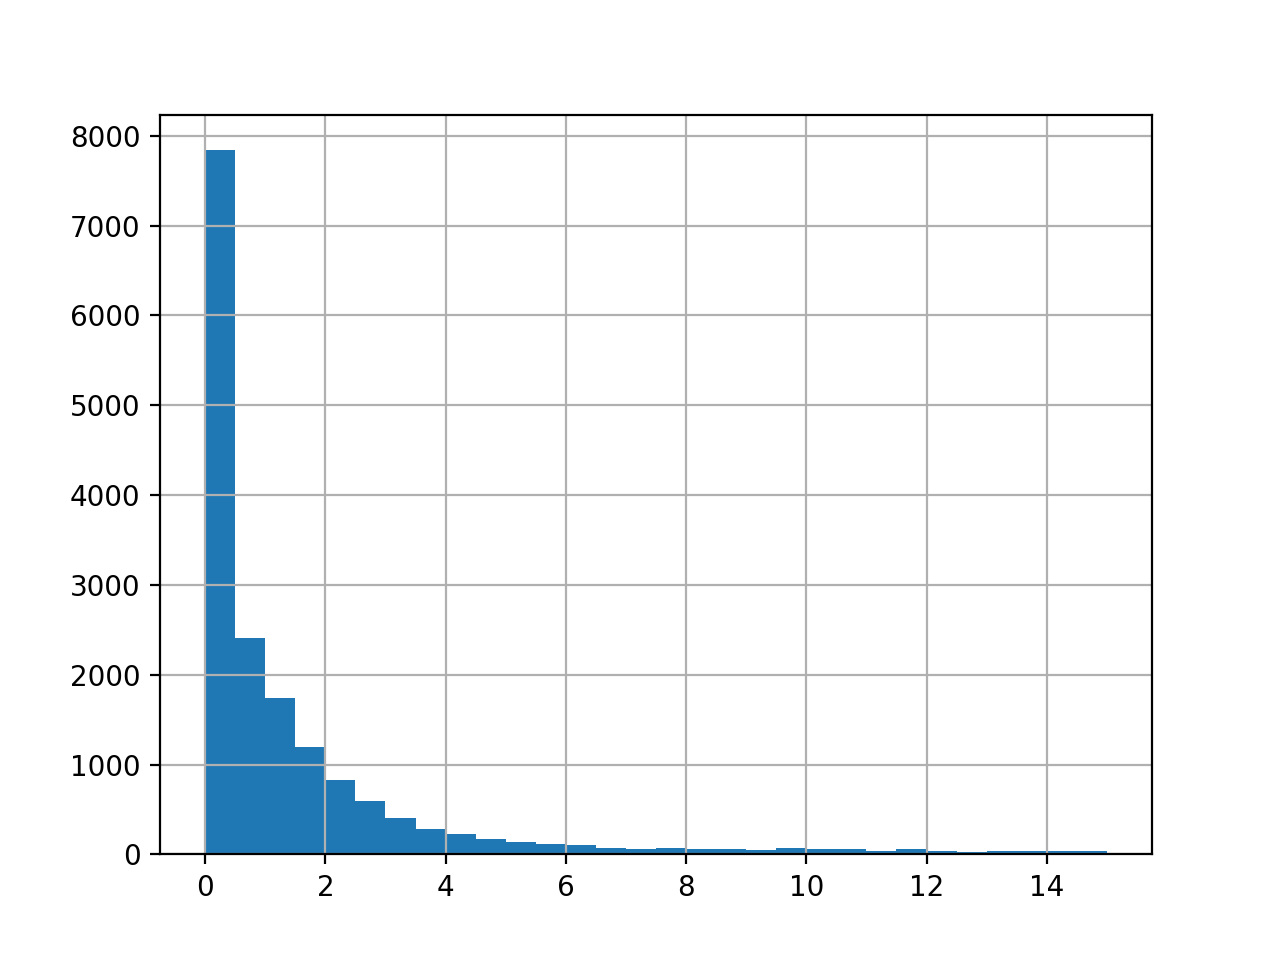

<AxesSubplot:>

In [54]:
#Histogram of nutrition adequancy if consider both purchase and own production
%matplotlib notebook
nutrient_ratio_total['Energy'].loc[:, nutrient_ratio_total['Energy'] <= 15].hist(bins=30)

#### Household with less than or equal to 2 youth(population under 18)

In [55]:
hh = hh_characteristics
hh['Youth'] = hh['F 00-03']+hh['M 00-03']+hh['F 04-08']+hh['M 04-08']+hh['F 09-13']+hh['M 09-13']+hh['F 14-18']+hh['M 14-18']
hh_young = hh[hh['Youth']<=2]
hh_young = hh_young['Youth']
hh_young

i       t     m      
10001   2010  Nigeria    1
10002   2010  Nigeria    2
10004   2010  Nigeria    1
10006   2010  Nigeria    0
10009   2010  Nigeria    2
                        ..
379144  2018  Nigeria    1
379146  2018  Nigeria    0
379148  2018  Nigeria    0
379154  2018  Nigeria    0
379155  2018  Nigeria    2
Name: Youth, Length: 9307, dtype: int64

In [56]:
young = nutri_total.merge(hh_young,left_on=['i','t'], right_on=['i','t'], how='inner')

In [57]:
nutrient_ratio_young = (young[use]/hh_rwi[use]).dropna()

nutrient_ratio_young.head()

Energy    Niacin   Protein  Riboflavin   Thiamin  \
i       t      m                                                             
10001.0 2010.0 Nigeria  5.497453  1.032000  1.817597    0.695647  1.018127   
        2012.0 Nigeria  1.938508  0.967975  1.084734    0.673945  0.879948   
10002.0 2010.0 Nigeria  2.434771  0.719661  1.054157    0.549002  0.662396   
        2012.0 Nigeria  1.791022  1.098129  1.243549    0.690729  0.864790   
10003.0 2018.0 Nigeria  0.093638  0.133696  0.213736    0.058301  0.017551   

                        Vitamin B-12  Vitamin B-6  
i       t      m                                   
10001.0 2010.0 Nigeria      0.886387     2.418437  
        2012.0 Nigeria      1.184329     1.794340  
10002.0 2010.0 Nigeria      0.669189     1.553052  
        2012.0 Nigeria      1.992775     2.215132  
10003.0 2018.0 Nigeria      0.426587     0.114286

<IPython.core.display.Javascript object>


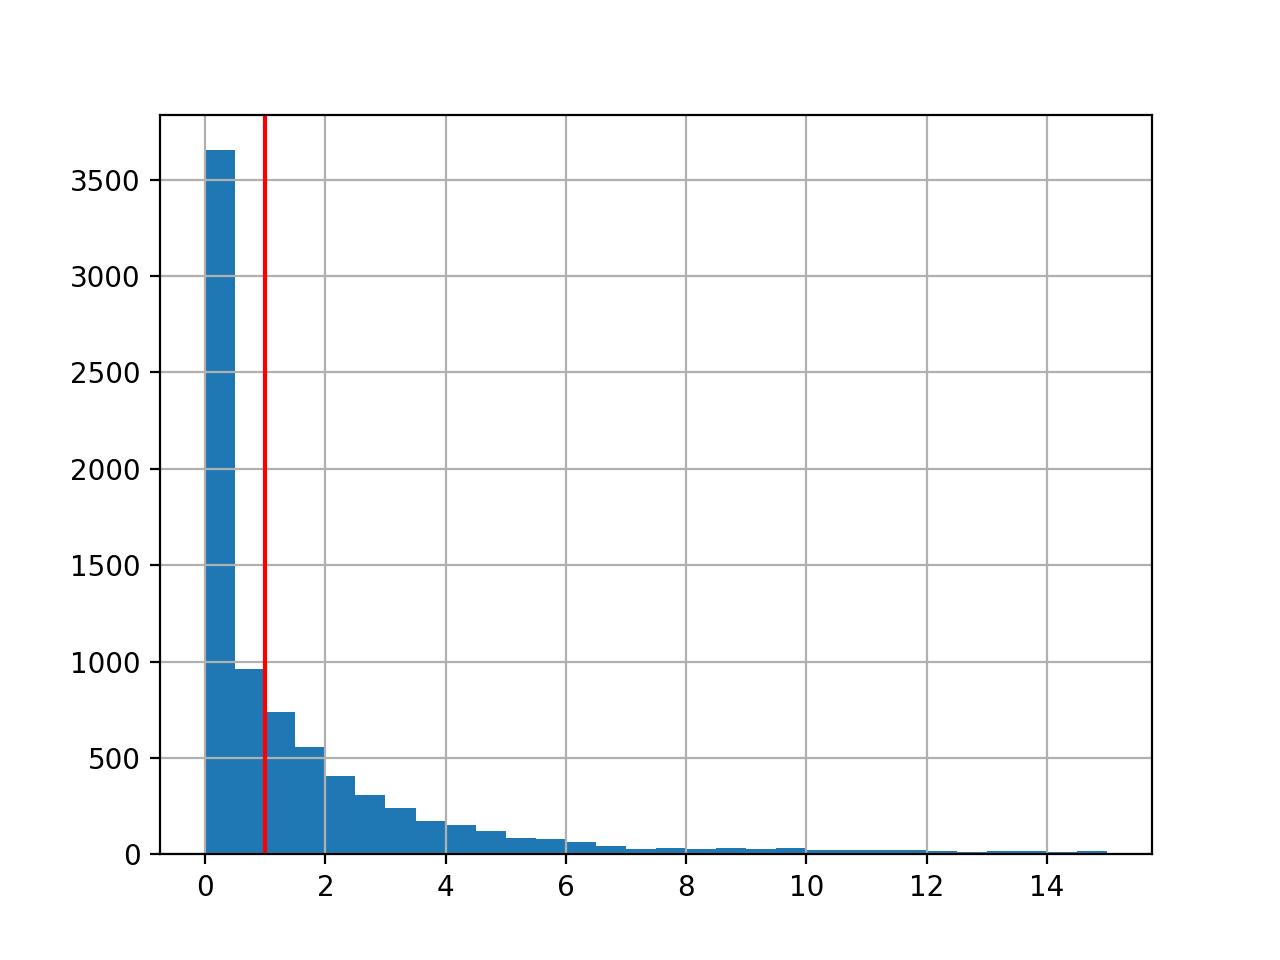

In [58]:
%matplotlib notebook
nutrient_ratio_young['Energy'].loc[:, nutrient_ratio_young['Energy'] <= 15].hist(bins=30)
plt.axvline(x = 1, color = 'red')

#### Household with more than 5 youths(population under 18)

In [59]:
#Household with more than 5 youths(population under 18)
hh_younger = hh[hh['Youth']>=5]
hh_younger = hh_younger['Youth']

In [60]:
younger = nutri_total.merge(hh_younger,left_on=['i','t'], right_on=['i','t'], how='inner')
younger.head()

Alanine  Alcohol, ethyl  Amino acids  Arginine         Ash  \
i       t                                                                    
10008.0 2010.0  19.2223          25.410          0.0   23.2963  109.262000   
        2012.0  13.3984          83.853          0.0   18.8444  127.812002   
10009.0 2018.0   0.0000           0.000          0.0    0.0000    0.000000   
10030.0 2010.0  18.6154           0.000          0.0   24.6514   72.991000   
        2012.0   8.8428           0.000          0.0    9.8648   16.392000   

                Aspartic acid  Betaine  Boron, B  Caffeine   Calcium, Ca  ...  \
i       t                                                                 ...   
10008.0 2010.0        39.1928     7.00   24600.0      31.5  10011.200000  ...   
        2012.0        26.9652     0.84       0.0      96.3  21390.020203  ...   
10009.0 2018.0         0.0000     0.00       0.0       0.0    170.000000  ...   
10030.0 2010.0        33.3567     0.14   24600.0       0.0   7573.800000  ...   
        2012.0        15.5384     0.28       0.0       0.0    284.400000  ...   

                Vitamin D3 (cholecalciferol)  Vitamin E (alpha-tocopherol)  \
i       t                                                                    
10008.0 2010.0                          1.75                       370.575   
        2012.0                          5.00                       148.260   
10009.0 2018.0                          0.00                         1.700   
10030.0 2010.0                          6.00                       100.299   
        2012.0                          5.00                        15.016   

                Vitamin E, added  Vitamin K (Dihydrophylloquinone)  \
i       t                                                            
10008.0 2010.0               0.0                               0.0   
        2012.0               0.0                               0.0   
10009.0 2018.0               0.0                               0.0   
10030.0 2010.0               0.0                               0.0   
        2012.0               0.0                               0.0   

                Vitamin K (Menaquinone-4)  Vitamin K (phylloquinone)  \
i       t                                                              
10008.0 2010.0                        0.0                     358.10   
        2012.0                        0.0                     316.36   
10009.0 2018.0                        0.0                      17.00   
10030.0 2010.0                        0.0                    2662.69   
        2012.0                        0.0                       7.42   

                Vitamins and Other Components         Water    Zinc, Zn  Youth  
i       t                                                                       
10008.0 2010.0                            0.0  12747.110000  140.850000      5  
        2012.0                            0.0  14983.360034  150.643901      5  
10009.0 2018.0                            0.0    625.800000   42.300000      5  
10030.0 2010.0                            0.0  13274.490000  127.125000      6  
        2012.0                            0.0   1803.726000    6.072000      5  

[5 rows x 169 columns]

In [61]:
nutrient_ratio_younger = (younger[use]/hh_rwi[use]).dropna()

nutrient_ratio_younger.head()

Energy    Niacin   Protein  Riboflavin   Thiamin  \
i       t      m                                                             
10008.0 2010.0 Nigeria  1.322416  0.408032  1.005548    0.306222  0.266121   
        2012.0 Nigeria  0.937855  0.538089  0.792310    0.329148  0.486878   
10009.0 2018.0 Nigeria  0.033288  0.083108  0.114286    0.037845  0.010969   
10030.0 2010.0 Nigeria  0.776245  0.271382  0.569650    0.210942  0.257398   
        2012.0 Nigeria  0.039004  0.045848  0.098767    0.019251  0.011825   

                        Vitamin B-12  Vitamin B-6  
i       t      m                                   
10008.0 2010.0 Nigeria      1.517143     0.682588  
        2012.0 Nigeria      1.380068     0.734663  
10009.0 2018.0 Nigeria      0.262515     0.076815  
10030.0 2010.0 Nigeria      0.575824     0.699719  
        2012.0 Nigeria      0.281811     0.046940

<IPython.core.display.Javascript object>


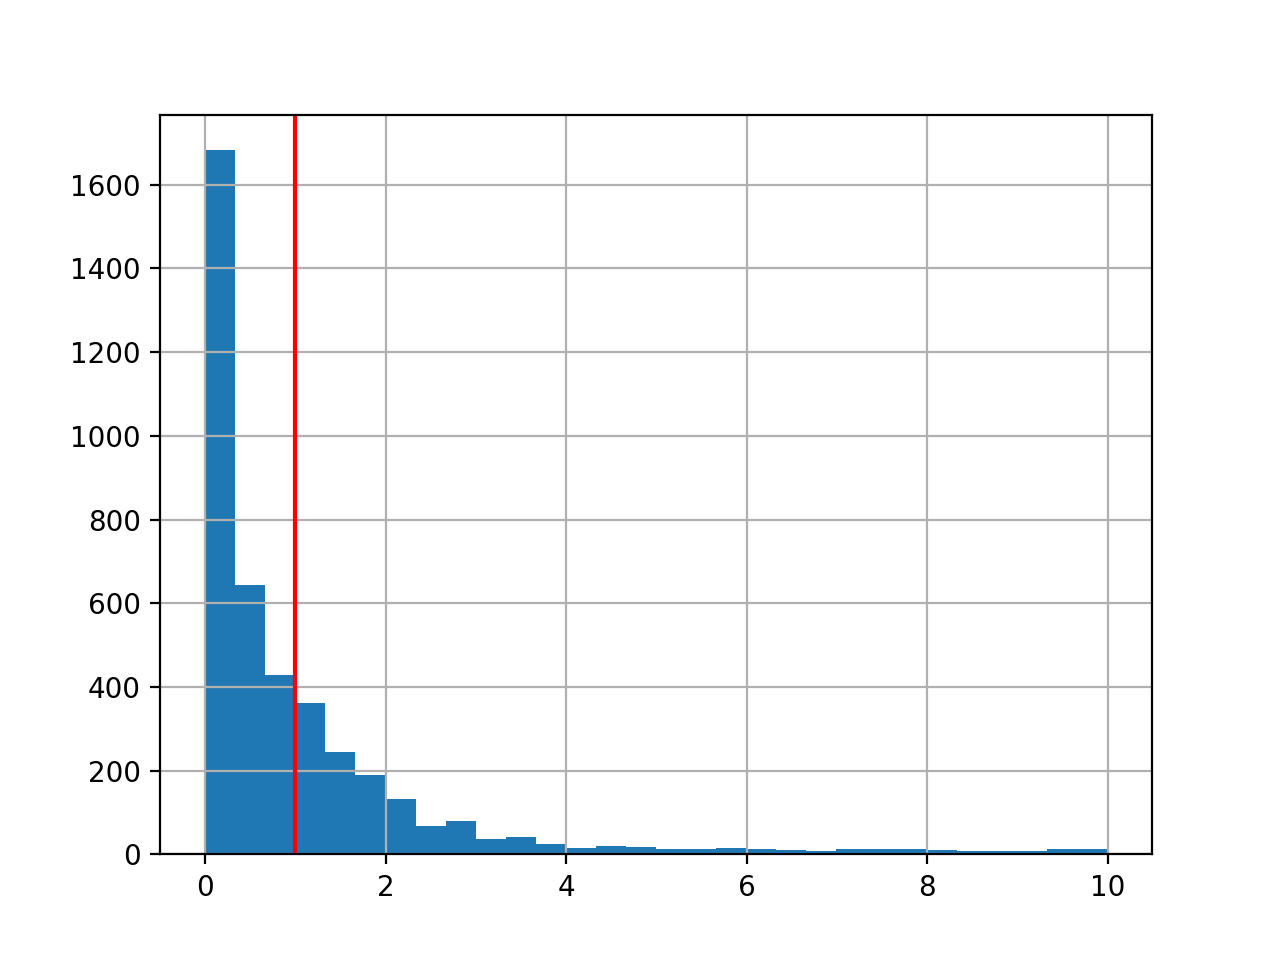

In [62]:
%matplotlib notebook
nutrient_ratio_younger['Energy'].loc[:, nutrient_ratio_younger['Energy'] <= 10].hist(bins=30)
plt.axvline(x = 1, color = 'red')

In [63]:
!pip install wbdata
import wbdata
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [64]:
def indicators_df(code,name):
    variable_labels = {code:name}
    NGA = wbdata.get_dataframe(variable_labels, country="NGA").sort_values('date')

    return NGA

def plot_indicators(code,name):
    world = indicators_df(code,name)

    date = np.asarray(world['date'].values, float)
    nga = world.values

    plt.figure(figsize=(14,9))
    plt.plot(date,nga)
    plt.title(name,fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Variable")
    plt.ylim(ymin=0)

In [65]:
code = "NY.GNP.PCAP.CD"
name = "GNI per capita"
world = indicators_df(code,name)
world

,GNI per capita
date,
1960,NaN
1961,NaN
1962,100.0
1963,110.0
1964,110.0
...,...
2017,2070.0
2018,1980.0
2019,2050.0


<IPython.core.display.Javascript object>


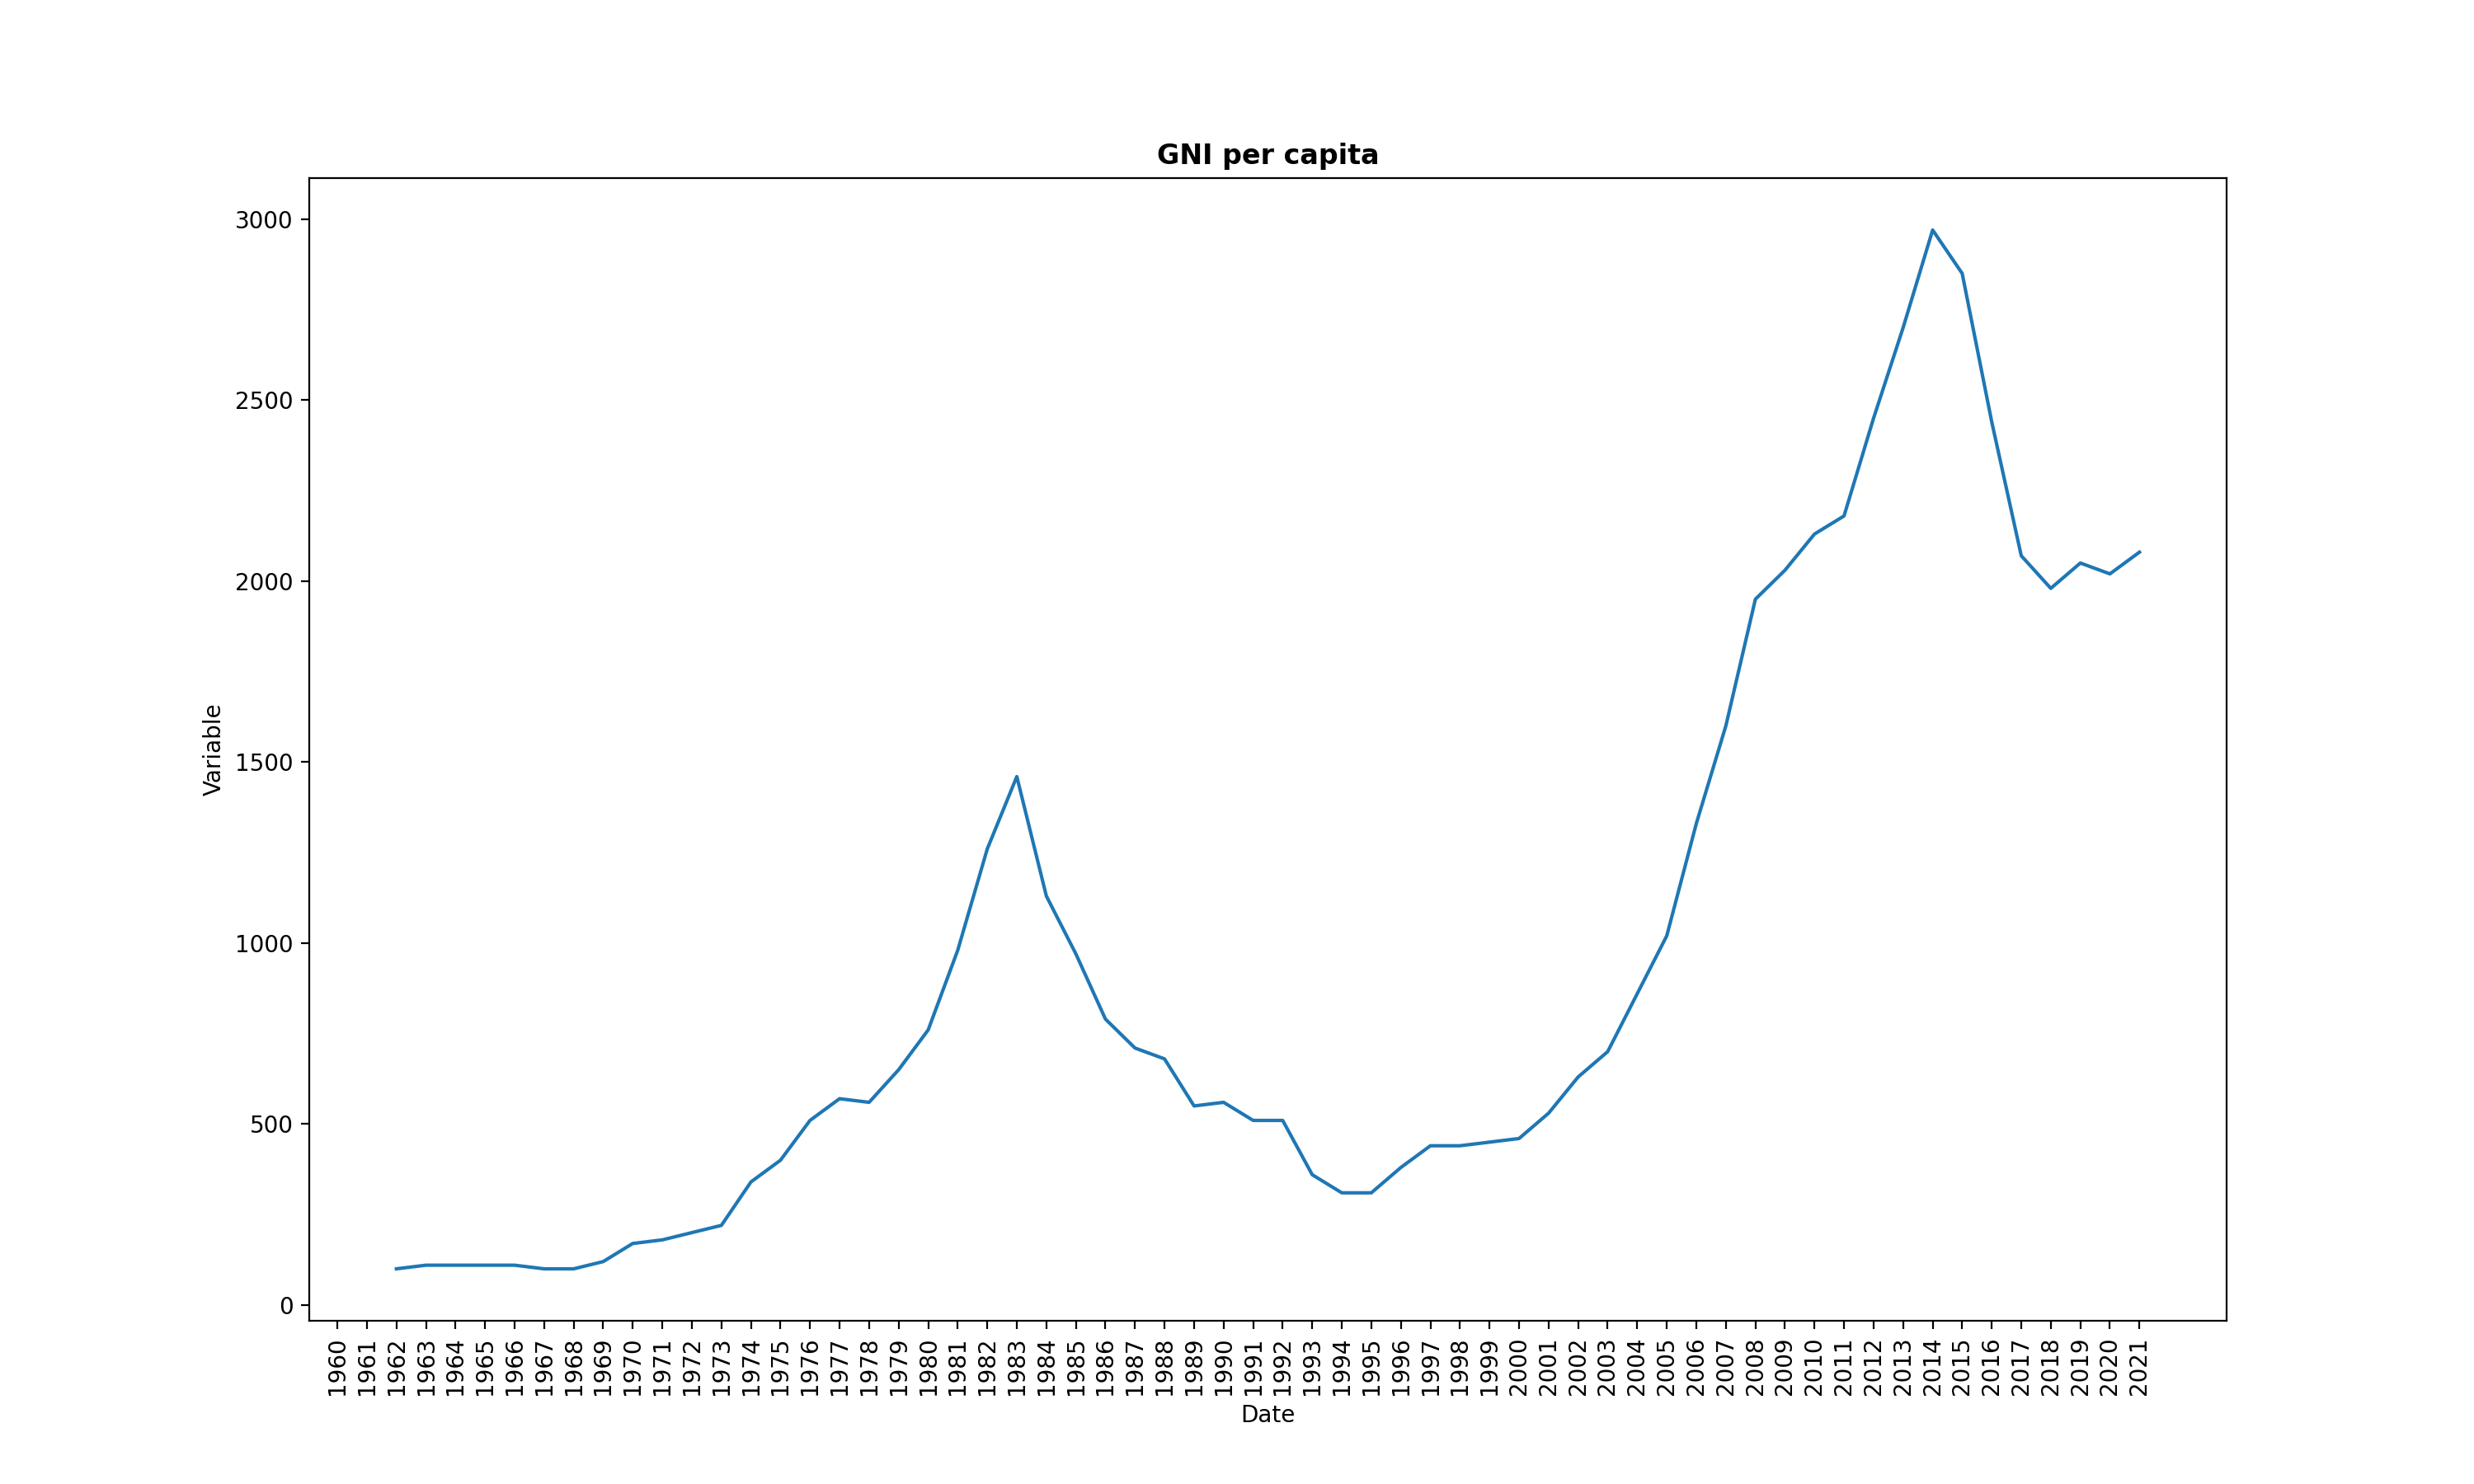

In [66]:
plt.figure(figsize=(15,9))
plt.plot(world)
plt.title(name,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Variable")
plt.xticks(world.index, rotation='vertical')
plt.show()